In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import numpy as np

with open('../products/json/data.json', 'r') as f:
    data = json.load(f)
    
np.random.seed(1)
np.random.shuffle(data)

for _, _, boxes in data:
    np.random.shuffle(boxes)

In [3]:
from dataset import LargeDataset

trainset = LargeDataset(data[:2], origin='../resources/')
validset = LargeDataset(data[2:3], origin='../resources/')

print(len(trainset), len(validset))

1160 130


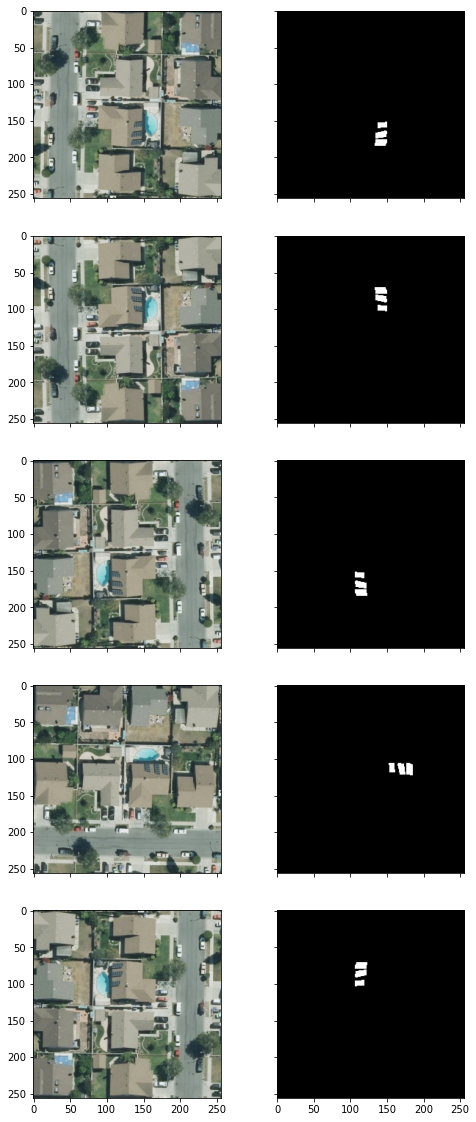

In [5]:
from torch.utils.data import DataLoader
from plots import plot_alongside

trainloader = DataLoader(trainset, batch_size=5)
validloader = DataLoader(validset, batch_size=5)

inputs, targets = next(iter(trainloader))
plot_alongside(inputs, targets)

In [6]:
from torchsummary import summary
from models import UNet

model = UNet(3, 1).cuda()
# model.load_state_dict(torch.load('...'))

summary(model, input_size=(3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
         MaxPool2d-7         [-1, 64, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]          73,856
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
        MaxPool2d-14          [-1, 128,

In [7]:
from criterions import DiceLoss
from torch.optim import Adam

criterion = DiceLoss()
optimizer = Adam(model.parameters(), lr=1e-3)

In [9]:
import train

best = train.train(model, (trainloader, validloader), criterion, optimizer, 5)
model.load_state_dict(best)

Epoch 1
----------
Training loss = 0.9776795064580852 +- 0.0739213671769658
Validation loss = 0.9994969299206367 +- 9.185159563481682e-05
New best model
1m3s elapsed
----------
Epoch 2
----------
Training loss = 0.7153570870387143 +- 0.2834049140728757
Validation loss = 0.9996543389100295 +- 0.00019251692801314032
1m4s elapsed
----------
Epoch 3
----------
Training loss = 0.6066707873652721 +- 0.2987104990070043
Validation loss = 0.4752861284292661 +- 0.27697306272155164
New best model
1m4s elapsed
----------
Epoch 4
----------
Training loss = 0.5442914371860439 +- 0.292084861902559
Validation loss = 0.7218705828373249 +- 0.20652256772445207
1m4s elapsed
----------
Epoch 5
----------
Training loss = 0.4951066575173674 +- 0.2849068494944282
Validation loss = 0.9467893884732173 +- 0.0777363457183624
1m4s elapsed
----------


<All keys matched successfully>

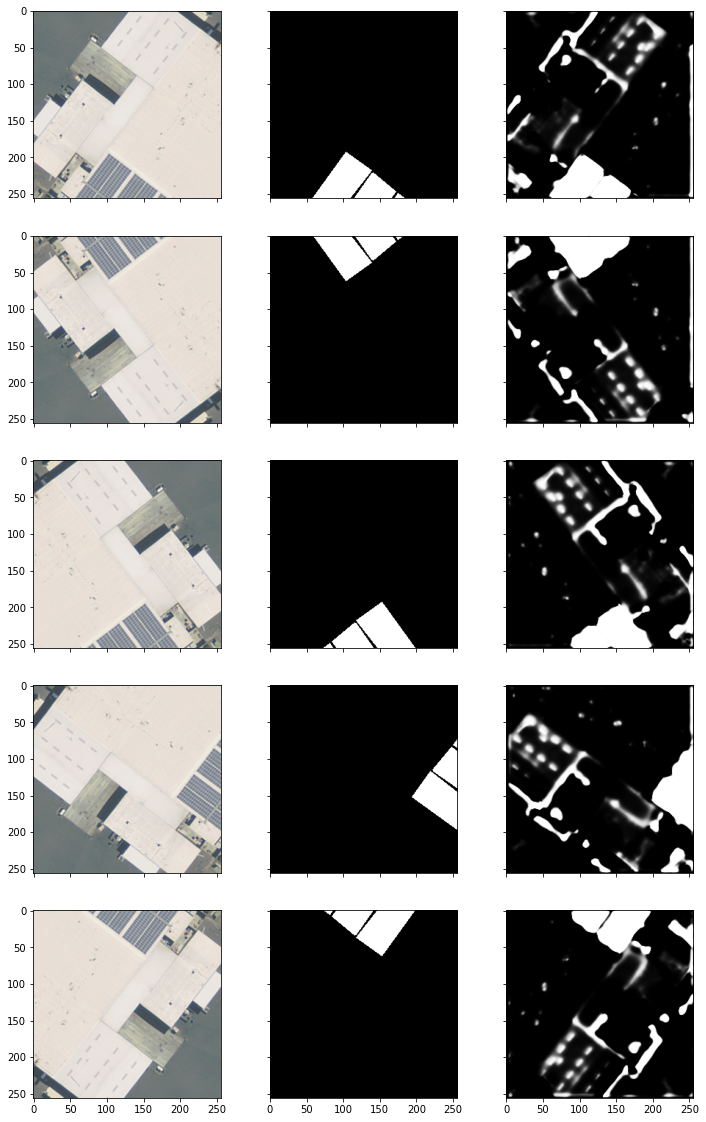

In [12]:
import torch

model.eval()

with torch.no_grad():
    for inputs, targets in validloader:
        break
    
    inputs = inputs.cuda()
    targets = targets.cuda()
    outputs = model(inputs)

plot_alongside(
    inputs.cpu(),
    targets.cpu(),
    outputs.cpu()
)